In [1]:
!pip install pandas
!pip install ultralytics


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ultralytics import YOLO
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# Yolo를 부르는법법

In [3]:
model=YOLO()

# Yolo 예측하기

In [21]:
model.predict('img\img.jpg')


image 1/1 d:\GitHub\Yolov8\img\img.jpg: 608x640 10 persons, 94.7ms
Speed: 4.7ms preprocess, 94.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

# 내가 만든 함수

In [30]:
# 엑셀표로 변환
def PredictToPandas(img_path, model,save_path=None):
    result = model.predict(img_path)
    if not result:
        return pd.DataFrame(columns=["xmin", "ymin", "xmax", "ymax", "conf", "cls", "name"])
    
    boxes = result[0].boxes
    xyxy = boxes.xyxy.cpu().numpy()
    cls = boxes.cls.cpu().numpy()
    conf = boxes.conf.cpu().numpy()
    df=pd.DataFrame({
        "xmin": xyxy[:, 0],
        "ymin": xyxy[:, 1],
        "xmax": xyxy[:, 2],
        "ymax": xyxy[:, 3],
        "conf": conf,
        "cls": cls,
        "name": [model.names[int(i)] for i in cls]
    })
    
    if save_path:
        os.makedirs('result', exist_ok=True)
        
        if save_path.endswith(".csv"):
            df.to_csv(save_path, index=False)
        elif save_path.endswith(".json"):
            df.to_json(save_path, orient="records", indent=4)
        elif save_path.endswith(".xlsx"):
            df.to_excel(save_path, index=False)
        else:
            print("Unsupported file format. Use .csv, .json, or .xlsx")
    return df
# 이미지지로 변환
def PredictToImg(img_path, model, color=(255, 255, 255),save_path=None):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    result = model.predict(img_path)
    
    if not result:
        print("No detection results.")
        return
    
    boxes = result[0].boxes
    
    for cls, xyxy, conf in zip(boxes.cls.cpu().numpy(), boxes.xyxy.cpu().numpy(), boxes.conf.cpu().numpy()):
        xmin, ymin, xmax, ymax = map(int, xyxy)
        name = model.names[int(cls)]
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color, 2)
        label = f"Class: {name}, Conf: {conf:.2f}"
        cv2.putText(image, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    if save_path:
        os.makedirs('result', exist_ok=True)
        cv2.imwrite(os.path.join('result', save_path),cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.show()


image 1/1 d:\GitHub\Yolov8\img\img.jpg: 608x640 10 persons, 82.3ms
Speed: 3.0ms preprocess, 82.3ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 640)


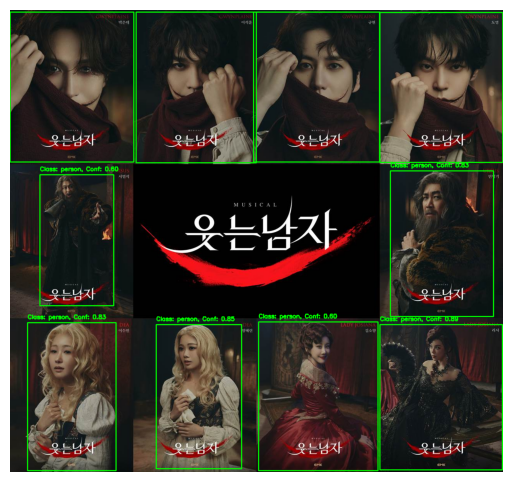

In [28]:
PredictToImg('img\img.jpg',model,save=True,save_path="img.jpg",color=(0,255,0))

In [31]:
PredictToPandas('img\img.jpg',model)


image 1/1 d:\GitHub\Yolov8\img\img.jpg: 608x640 10 persons, 102.1ms
Speed: 5.0ms preprocess, 102.1ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 640)


,xmin,ymin,xmax,ymax,conf,cls,name
0,956.385498,6.373301,1275.106934,394.750671,0.937266,0.0,person
1,0.487729,5.959741,320.423676,393.242249,0.916793,0.0,person
2,326.468628,5.762970,637.987427,395.066925,0.904511,0.0,person
3,630.665039,5.002294,957.248657,393.403107,0.889777,0.0,person
4,957.153259,814.927368,1274.842163,1190.824707,0.885690,0.0,person
5,378.273102,814.684021,599.140137,1187.309082,0.852172,0.0,person
6,984.956970,416.314178,1251.347534,793.525330,0.827345,0.0,person
7,45.489658,809.057129,274.139893,1192.339844,0.825721,0.0,person
8,77.835861,426.113922,268.247101,765.586304,0.603747,0.0,person
9,643.926208,807.590637,952.819702,1192.741699,0.602196,0.0,person
